First I will import the libraries

In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
import contextily as ctx

In [4]:
import matplotlib.pyplot as plt

In [5]:
import plotly.express as px

## College Data

Next, I'll add my data indicating the name and location of colleges LA County

In [6]:
gdf = gpd.read_file('Colleges_and_Universities.zip')

I want to take a look at what my data looks like: 

In [7]:
gdf.head()

OBJECTID                             source  ext_id       cat1  \
0      2878                                211    None  Education   
1      2895                                211    None  Education   
2      2973                                211    None  Education   
3      3097                                211    None  Education   
4     11961  HSIP Freedom CollegesUniversities  203049  Education   

                        cat2  cat3                     org_name  \
0  Colleges and Universities  None            www.csupomona.edu   
1  Colleges and Universities  None  www.calstate.edu/executive/   
2  Colleges and Universities  None           www.calstatela.edu   
3  Colleges and Universities  None                www.laccd.edu   
4  Colleges and Universities  None                    LA County   

                                                Name  \
0   California State Polytechnic University - Pomona   
1  California State University, The - Office Of T...   
2            California State University Los Angeles   
3             Los Angeles Community College District   
4  Hebrew Union College-Jewish Institute Of Religion   

                     addrln1 addrln2  ...  \
0        3801 W. Temple Ave.    None  ...   
1           401 Golden Shore    None  ...   
2  5151 State University Dr.    None  ...   
3         770 Wilshire Blvd.    None  ...   
4        3077 University Ave    None  ...   

                                     link use_type   latitude   longitude  \
0   http://egis3.lacounty.gov/lms/?p=3072  publish  34.049531 -117.814466   
1   http://egis3.lacounty.gov/lms/?p=3084  publish  33.764616 -118.201257   
2   http://egis3.lacounty.gov/lms/?p=3145  publish  34.062769 -118.170923   
3   http://egis3.lacounty.gov/lms/?p=3246  publish  34.049138 -118.258111   
4  http://egis3.lacounty.gov/lms/?p=12778  publish  34.025458 -118.282567   

   date_updat email dis_status       POINT_X       POINT_Y  \
0  2013-06-01  None       None  6.617873e+06  1.840458e+06   
1  2013-06-01  None       None  6.500498e+06  1.736780e+06   
2  2013-06-01  None       None  6.509902e+06  1.845267e+06   
3  2013-06-01  None       None  6.483483e+06  1.840363e+06   
4  2010-11-01  None       None  6.476050e+06  1.831765e+06   

                      geometry  
0  POINT (-117.81447 34.04953)  
1  POINT (-118.20126 33.76462)  
2  POINT (-118.17092 34.06277)  
3  POINT (-118.25811 34.04914)  
4  POINT (-118.28257 34.02546)  

[5 rows x 30 columns]

In [8]:
gdf.shape

(217, 30)

Now that I know that my rows and columns consist of, I'm going to narrow down the data. I'm mostly focus on the ID, name, location, and geometry

In [9]:
columns_to_keep= ['OBJECTID',
 'source',
 'ext_id',
 'cat1',
 'cat2',
 'cat3',
 'org_name',
 'Name',
 'addrln1', 
 'city',
 'state',
 'info1',
 'info2',
 'post_id',
 'zip',
 'latitude',
 'longitude',
 'dis_status',
 'geometry']

In [10]:
gdf= gdf[columns_to_keep]

For mapping purposes, I only need to the ID, name and geometry (latitude and longitude)

In [11]:
desired_columns=['OBJECTID','Name','addrln1','city','latitude','longitude','geometry']

gdf[desired_columns]

OBJECTID                                               Name  \
0        2878   California State Polytechnic University - Pomona   
1        2895  California State University, The - Office Of T...   
2        2973            California State University Los Angeles   
3        3097             Los Angeles Community College District   
4       11961  Hebrew Union College-Jewish Institute Of Religion   
..        ...                                                ...   
212     62177                Los Angeles Trade Technical College   
213     62310                                    Help Group, The   
214     62928                           West Los Angeles College   
215     63227              Long Beach Community College District   
216     63706  West Los Angeles College - Community Services ...   

                       addrln1          city   latitude   longitude  \
0          3801 W. Temple Ave.        Pomona  34.049531 -117.814466   
1             401 Golden Shore    Long Beach  33.764616 -118.201257   
2    5151 State University Dr.   Los Angeles  34.062769 -118.170923   
3           770 Wilshire Blvd.   Los Angeles  34.049138 -118.258111   
4          3077 University Ave   Los Angeles  34.025458 -118.282567   
..                         ...           ...        ...         ...   
212    400 W. Washington Blvd.   Los Angeles  34.033227 -118.270041   
213         13130 Burbank Blvd  Sherman Oaks  34.171910 -118.419360   
214          9000 Overland Ave   Culver City  34.003062 -118.386221   
215           4901 E Carson St    Long Beach  33.834305 -118.135638   
216          9000 Overland Ave   Culver City  34.003062 -118.386221   

                        geometry  
0    POINT (-117.81447 34.04953)  
1    POINT (-118.20126 33.76462)  
2    POINT (-118.17092 34.06277)  
3    POINT (-118.25811 34.04914)  
4    POINT (-118.28257 34.02546)  
..                           ...  
212  POINT (-118.27004 34.03323)  
213  POINT (-118.41936 34.17191)  
214  POINT (-118.38622 34.00306)  
215  POINT (-118.13564 33.83430)  
216  POINT (-118.38622 34.00306)  

[217 rows x 7 columns]

Saving this narrowed down list as gdf_trimmed to refer back to

In [12]:
gdf_trimmed=gdf[desired_columns].copy()
gdf_trimmed

OBJECTID                                               Name  \
0        2878   California State Polytechnic University - Pomona   
1        2895  California State University, The - Office Of T...   
2        2973            California State University Los Angeles   
3        3097             Los Angeles Community College District   
4       11961  Hebrew Union College-Jewish Institute Of Religion   
..        ...                                                ...   
212     62177                Los Angeles Trade Technical College   
213     62310                                    Help Group, The   
214     62928                           West Los Angeles College   
215     63227              Long Beach Community College District   
216     63706  West Los Angeles College - Community Services ...   

                       addrln1          city   latitude   longitude  \
0          3801 W. Temple Ave.        Pomona  34.049531 -117.814466   
1             401 Golden Shore    Long Beach  33.764616 -118.201257   
2    5151 State University Dr.   Los Angeles  34.062769 -118.170923   
3           770 Wilshire Blvd.   Los Angeles  34.049138 -118.258111   
4          3077 University Ave   Los Angeles  34.025458 -118.282567   
..                         ...           ...        ...         ...   
212    400 W. Washington Blvd.   Los Angeles  34.033227 -118.270041   
213         13130 Burbank Blvd  Sherman Oaks  34.171910 -118.419360   
214          9000 Overland Ave   Culver City  34.003062 -118.386221   
215           4901 E Carson St    Long Beach  33.834305 -118.135638   
216          9000 Overland Ave   Culver City  34.003062 -118.386221   

                        geometry  
0    POINT (-117.81447 34.04953)  
1    POINT (-118.20126 33.76462)  
2    POINT (-118.17092 34.06277)  
3    POINT (-118.25811 34.04914)  
4    POINT (-118.28257 34.02546)  
..                           ...  
212  POINT (-118.27004 34.03323)  
213  POINT (-118.41936 34.17191)  
214  POINT (-118.38622 34.00306)  
215  POINT (-118.13564 33.83430)  
216  POINT (-118.38622 34.00306)  

[217 rows x 7 columns]

Next, I want to see plot the Universities and Colleges through the geometry column and match it. So first, I want to take a look at my geometry column.

In [13]:
gdf_trimmed.geometry

0      POINT (-117.81447 34.04953)
1      POINT (-118.20126 33.76462)
2      POINT (-118.17092 34.06277)
3      POINT (-118.25811 34.04914)
4      POINT (-118.28257 34.02546)
                  ...             
212    POINT (-118.27004 34.03323)
213    POINT (-118.41936 34.17191)
214    POINT (-118.38622 34.00306)
215    POINT (-118.13564 33.83430)
216    POINT (-118.38622 34.00306)
Name: geometry, Length: 217, dtype: geometry

Now that I've seen my geometry column listing the latitude and longitude of a point to represent the university locations. I want to match the university name to the latitude and longitude listed. This way, I can easily find the name of the university when looking at my map.

In order to do this for all the schools, I'm going to create a loop. This loop will show the name and geometry for each of my universities. I will use the loop for all my data points (universities) in gdf_trimmed

In [14]:
#for index, row in gdf_trimmed.iterrows():
    #print(row.Name,row.latitude,row.longitude)

Next, I need to match make sure that my data points have the correct projection.

In [15]:
gdf_prj = gdf_trimmed.to_crs(epsg=3857)

Now I'm going to plot the locations of the schools in LA County

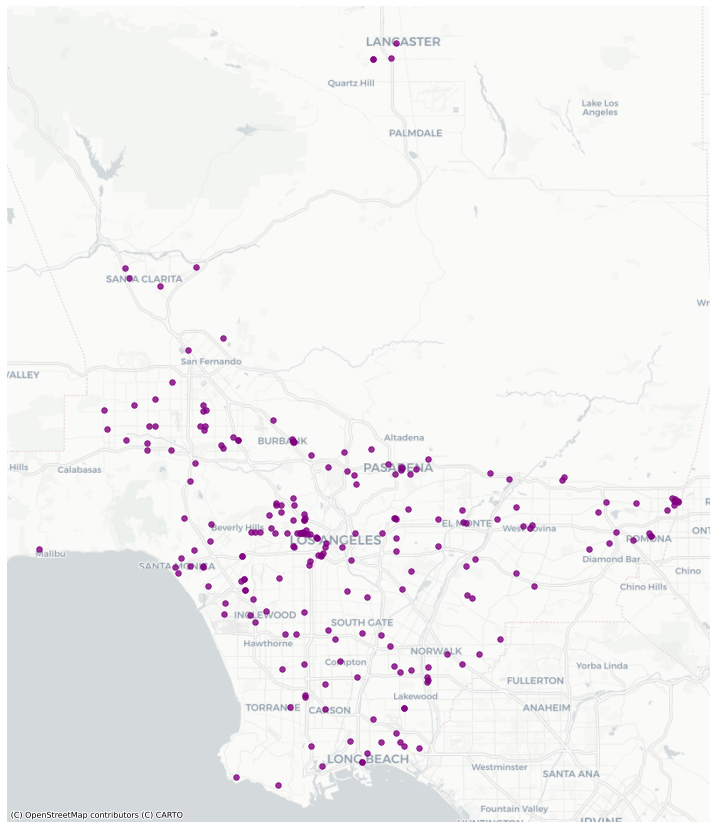

In [16]:
fig,ax = plt.subplots(figsize=(15,15))

gdf_prj.plot(ax=ax,
             color='purple',
             markersize=30, alpha=.8,)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Through the loop, I can now see the locations of all the schools in LA County and if I click on one data point, I will get the name of the university.

Now that I have the location and names of the universities in LA County, I want to see what are the most common stores located around them. In order to do this, I will be using the buffer function. Once I've created a buffer around the schools - I will add the locations of different stores and narrow down the most common stores located in the buffer zone through spatial join.

### Map 2 mile buffer area around college

In [17]:
gdf_buffer = gdf_prj.copy()

In [18]:
gdf_buffer = gdf_buffer.to_crs(epsg=3857)

In order to create a clear correlation between the universities and store locations, I need to pick a short distance. I'm going to start with 2 miles around the schools and see what I find. 2 miles is around 3218 meters. 

In [19]:
gdf_buffer['geometry']=gdf_buffer['geometry'].buffer(3218)

In [20]:
gdf_buffer.head()

OBJECTID                                               Name  \
0      2878   California State Polytechnic University - Pomona   
1      2895  California State University, The - Office Of T...   
2      2973            California State University Los Angeles   
3      3097             Los Angeles Community College District   
4     11961  Hebrew Union College-Jewish Institute Of Religion   

                     addrln1         city   latitude   longitude  \
0        3801 W. Temple Ave.       Pomona  34.049531 -117.814466   
1           401 Golden Shore   Long Beach  33.764616 -118.201257   
2  5151 State University Dr.  Los Angeles  34.062769 -118.170923   
3         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
4        3077 University Ave  Los Angeles  34.025458 -118.282567   

                                            geometry  
0  POLYGON ((-13111828.370 4035454.765, -13111843...  
1  POLYGON ((-13154885.747 3997239.323, -13154901...  
2  POLYGON ((-13151508.981 4037233.482, -13151524...  
3  POLYGON ((-13161214.705 4035401.964, -13161230...  
4  POLYGON ((-13163937.134 4032220.922, -13163952...

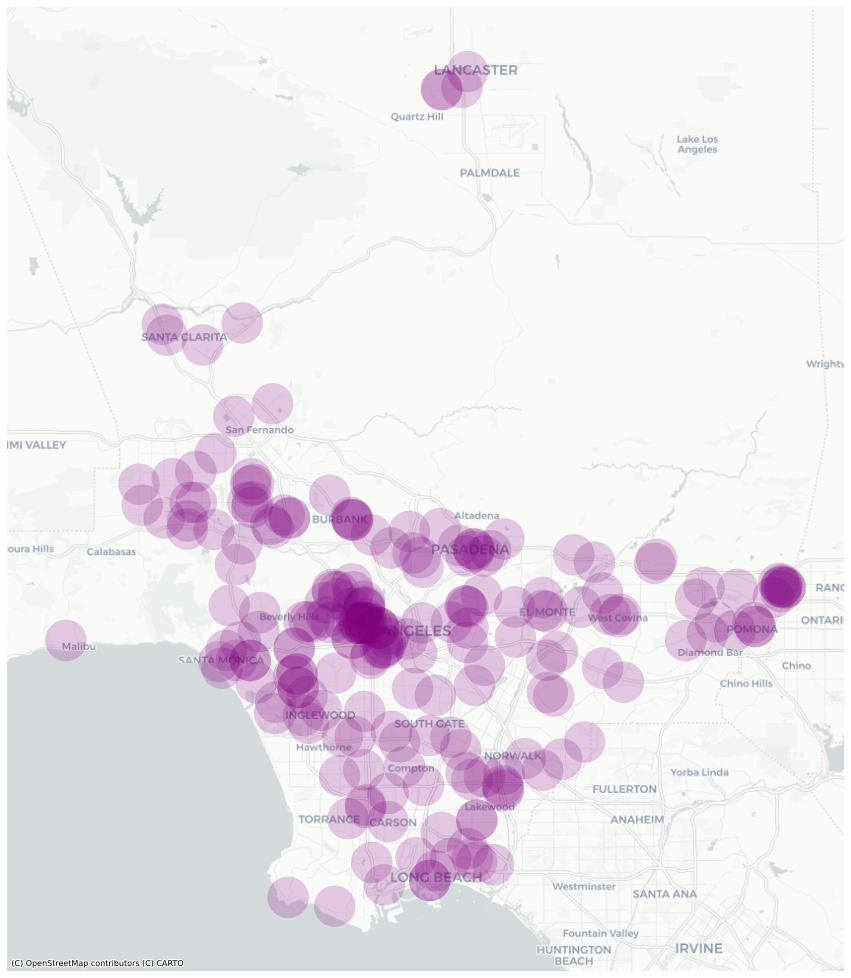

In [21]:
fig,ax = plt.subplots(figsize=(15,20))

gdf_buffer.plot(ax=ax,
             color='purple',
             markersize=.5, alpha=.2,)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

I've mapped a 3000 meter buffer zone arounf each university. I realized that this would need more refinement since the points that indicate the university location is just a center point and so the buffer is starting from there rather than starting from the outer boundary of each school. I still need to figure out how to map the out boundary of each university in order to accurately show the buffer zone outside of the school instead of outside the center point.

#### Add grocery data

In [22]:
grs= gpd.read_file('GroceryStores.geojson')

In [23]:
list(grs)

['Store_Name',
 'Store_Chain',
 'Street_Number',
 'Street_Name',
 'Additional Address',
 'City',
 'Zip_Code',
 'Latitude',
 'Longitude',
 'geometry']

In [24]:
desired_columns=['Store_Name','City','Store_Chain','Latitude','Longitude','geometry']

grs_trimmed= grs[desired_columns]

In [25]:
grs_trimmed.shape

(1377, 6)

In [26]:
grs_trimmed.head(10)

Store_Name              City      Store_Chain  Latitude  \
0   99 Ranch Market 38          Alhambra  99 Ranch Market  34.09719   
1   99 RANCH MARKET 17           Artesia  99 Ranch Market  33.87005   
2   99 Ranch Market 18  Hacienda Heights  99 Ranch Market  33.99284   
3    99 RANCH MARKET 7           Arcadia  99 Ranch Market  34.12338   
4    99 Ranch Market 3   Rowland Heights  99 Ranch Market  33.99646   
5   99 Ranch Market 13          Van Nuys  99 Ranch Market  34.18811   
6    99 RANCH MARKET 6           Gardena  99 Ranch Market  33.87275   
7   99 Ranch Market 12     Monterey Park  99 Ranch Market  34.06256   
8  99 Ranch Market 208       San Gabriel  99 Ranch Market  34.07961   
9   99 Ranch Market 11          Rosemead  99 Ranch Market  34.06261   

   Longitude                           geometry  
0  -118.1227  POINT (-13149358.815 4041859.746)  
1  -118.0824  POINT (-13144872.640 4011366.235)  
2  -117.9318  POINT (-13128107.924 4027840.654)  
3  -118.0597  POINT (-13142345.687 4045381.002)  
4  -117.8884  POINT (-13123276.658 4028326.701)  
5  -118.4661  POINT (-13187585.928 4054088.658)  
6  -118.2966  POINT (-13168717.275 4011728.231)  
7  -118.1334  POINT (-13150549.934 4037205.402)  
8  -118.1015  POINT (-13146998.842 4039496.720)  
9  -118.0907  POINT (-13145796.591 4037212.121)

In [27]:
store_freq = grs_trimmed.Store_Chain.value_counts().reset_index()
store_freq.to_csv('store_freq.csv')

In [28]:
stores_freq1 = pd.read_csv('store_freq.csv',index_col=0)
stores_freq1.head()

index  Store_Chain
0       Ralphs          145
1         Vons          111
2  Smart&final           99
3   Albertsons           97
4       Target           76

In [29]:
stores_county = stores_freq1.drop(index=[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46])
print(stores_county)

               index  Store_Chain
0             Ralphs          145
1               Vons          111
2        Smart&final           99
3         Albertsons           97
4             Target           76
5   Mother_Nutrition           65
6        Trader_joes           60
7        Food_4_Less           54
8            Walmart           49
9         Fresh&Easy           47
10       Sav_on_drug           44
11  Superior_grocers           33
12       Whole_Foods           33
13        Numero_uno           30
14       Stater_bros           29
15          El_Super           28
16           Sprouts           27
17          Vallarta           27
18              Aldi           27
19  Costco_Wholesale           26
20         Northgate           20


In [30]:
stores_county.columns = ['Store_chain', 'number']
stores_county

Store_chain  number
0             Ralphs     145
1               Vons     111
2        Smart&final      99
3         Albertsons      97
4             Target      76
5   Mother_Nutrition      65
6        Trader_joes      60
7        Food_4_Less      54
8            Walmart      49
9         Fresh&Easy      47
10       Sav_on_drug      44
11  Superior_grocers      33
12       Whole_Foods      33
13        Numero_uno      30
14       Stater_bros      29
15          El_Super      28
16           Sprouts      27
17          Vallarta      27
18              Aldi      27
19  Costco_Wholesale      26
20         Northgate      20

In [31]:
grs_s = grs_trimmed.to_crs(epsg=3857)

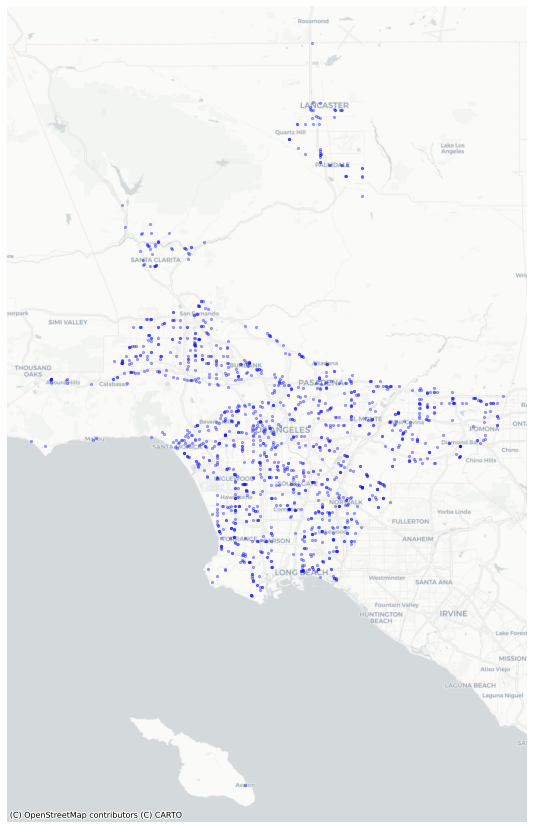

In [32]:
fig, ax = plt.subplots(figsize=(15,15))

grs_s.plot(ax=ax,
         color='blue', 
         markersize=5,
         alpha=0.3)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [33]:
minx, miny, maxx, maxy = gdf_buffer.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13217696.140804501
-13099747.188059123
3990006.762918487
4125815.1935587507


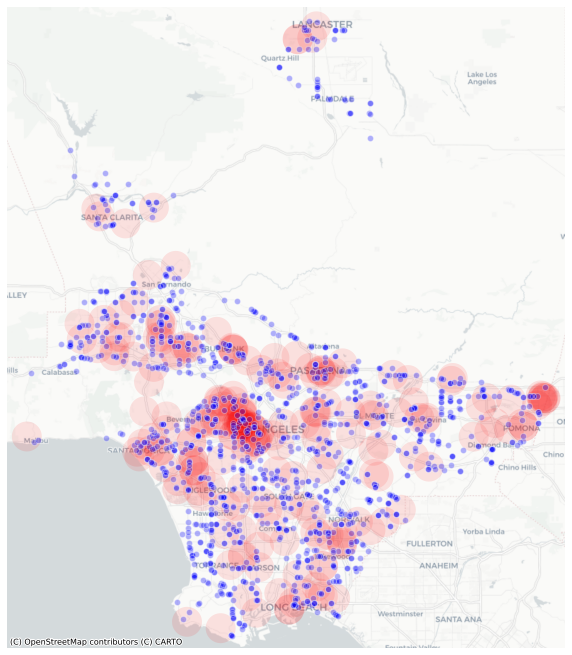

In [34]:
fig, ax = plt.subplots(figsize=(10, 15))

gdf_buffer.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=10,
            alpha=0.1)


grs_s.plot(ax=ax, 
        color='blue', 
        edgecolor='white',
        alpha=0.3)

ax.set_xlim(minx - 1000, maxx + 1000) 
ax.set_ylim(miny - 1000, maxy + 1000)


ax.axis('off')


ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [35]:
## this visually shows all the stores that fall within that buffer zone. Now I want to do a spatial join to find out which store is the most common

In [36]:
join = gpd.sjoin( gdf_buffer,grs_s, how='left')
join.head(20)

OBJECTID                                               Name  \
0      2878   California State Polytechnic University - Pomona   
1      2895  California State University, The - Office Of T...   
1      2895  California State University, The - Office Of T...   
1      2895  California State University, The - Office Of T...   
1      2895  California State University, The - Office Of T...   
1      2895  California State University, The - Office Of T...   
1      2895  California State University, The - Office Of T...   
1      2895  California State University, The - Office Of T...   
1      2895  California State University, The - Office Of T...   
1      2895  California State University, The - Office Of T...   
1      2895  California State University, The - Office Of T...   
2      2973            California State University Los Angeles   
2      2973            California State University Los Angeles   
3      3097             Los Angeles Community College District   
3      3097             Los Angeles Community College District   
3      3097             Los Angeles Community College District   
3      3097             Los Angeles Community College District   
3      3097             Los Angeles Community College District   
3      3097             Los Angeles Community College District   
3      3097             Los Angeles Community College District   

                     addrln1         city   latitude   longitude  \
0        3801 W. Temple Ave.       Pomona  34.049531 -117.814466   
1           401 Golden Shore   Long Beach  33.764616 -118.201257   
1           401 Golden Shore   Long Beach  33.764616 -118.201257   
1           401 Golden Shore   Long Beach  33.764616 -118.201257   
1           401 Golden Shore   Long Beach  33.764616 -118.201257   
1           401 Golden Shore   Long Beach  33.764616 -118.201257   
1           401 Golden Shore   Long Beach  33.764616 -118.201257   
1           401 Golden Shore   Long Beach  33.764616 -118.201257   
1           401 Golden Shore   Long Beach  33.764616 -118.201257   
1           401 Golden Shore   Long Beach  33.764616 -118.201257   
1           401 Golden Shore   Long Beach  33.764616 -118.201257   
2  5151 State University Dr.  Los Angeles  34.062769 -118.170923   
2  5151 State University Dr.  Los Angeles  34.062769 -118.170923   
3         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
3         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
3         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
3         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
3         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
3         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
3         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   

                                            geometry  index_right  \
0  POLYGON ((-13111828.370 4035454.765, -13111843...          NaN   
1  POLYGON ((-13154885.747 3997239.323, -13154901...       1195.0   
1  POLYGON ((-13154885.747 3997239.323, -13154901...       1083.0   
1  POLYGON ((-13154885.747 3997239.323, -13154901...        554.0   
1  POLYGON ((-13154885.747 3997239.323, -13154901...        325.0   
1  POLYGON ((-13154885.747 3997239.323, -13154901...         51.0   
1  POLYGON ((-13154885.747 3997239.323, -13154901...        222.0   
1  POLYGON ((-13154885.747 3997239.323, -13154901...       1305.0   
1  POLYGON ((-13154885.747 3997239.323, -13154901...        984.0   
1  POLYGON ((-13154885.747 3997239.323, -13154901...        476.0   
1  POLYGON ((-13154885.747 3997239.323, -13154901...        801.0   
2  POLYGON ((-13151508.981 4037233.482, -13151524...        481.0   
2  POLYGON ((-13151508.981 4037233.482, -13151524...        787.0   
3  POLYGON ((-13161214.705 4035401.964, -13161230...        469.0   
3  POLYGON ((-13161214.705 4035401.964, -13161230...        779.0   
3  POLYGON ((-13161214.705 4035401.964, -13161230...        674.0   
3  POLYGON ((-

#### Counting number of stores that fall within each buffer

In [37]:
stores_in_buffer = join.Name.value_counts().rename_axis('Name').reset_index(name='store_count')
stores_in_buffer.head(20)

Name  store_count
0                          Marinello School Of Beauty          104
1                         Marinello Schools Of Beauty           46
2                                      Kaplan College           37
3                                 Intercoast Colleges           35
4                     Universal College Of Beauty Inc           31
5                          Liberty Training Institute           29
6                                      Brooks College           29
7                        Westwood College-Los Angeles           27
8                        Marian Health Careers Center           27
9                            La College International           26
10                     Diversified Language Institute           25
11                 Abram Friedman Occupational Center           25
12                Los Angeles Trade Technical College           25
13                       Associated Technical College           25
14                            Southwestern Law School           25
15                                        Ces College           25
16      Walter Jay Md Institute An Educational Center           25
17  Yeshiva Ohr Elchonon Chabad West Coast Talmudi...           24
18                                      Bryan College           24
19                           Dongguk Royal University           24

In [38]:
#merge store count back to the buffer zones

In [39]:
buffer_merge=gdf_buffer.merge(stores_in_buffer,on='Name')
buffer_merge.head(10)

OBJECTID                                               Name  \
0      2878   California State Polytechnic University - Pomona   
1      2895  California State University, The - Office Of T...   
2      2973            California State University Los Angeles   
3      3097             Los Angeles Community College District   
4     11961  Hebrew Union College-Jewish Institute Of Religion   
5     11962                     Itt Technical Institute-Sylmar   
6     11963              Antioch University-Los Angeles Branch   
7     11964                          Platt College-Los Angeles   
8     11965                Los Angeles Ort Technical Institute   
9     11966                   Everest College-West Los Angeles   

                          addrln1         city   latitude   longitude  \
0             3801 W. Temple Ave.       Pomona  34.049531 -117.814466   
1                401 Golden Shore   Long Beach  33.764616 -118.201257   
2       5151 State University Dr.  Los Angeles  34.062769 -118.170923   
3              770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
4             3077 University Ave  Los Angeles  34.025458 -118.282567   
5             12669 Encinitas Ave       Sylmar  34.300010 -118.473909   
6            400 Corporate Pointe  Culver City  33.987640 -118.384651   
7  1000 South Fremont Avenue, A9W     Alhambra  34.081813 -118.151838   
8              6435 Wilshire Blvd  Los Angeles  34.063876 -118.369383   
9      3000 S Robertson Blvd #300  Los Angeles  34.032826 -118.389963   

                                            geometry  store_count  
0  POLYGON ((-13111828.370 4035454.765, -13111843...            1  
1  POLYGON ((-13154885.747 3997239.323, -13154901...           10  
2  POLYGON ((-13151508.981 4037233.482, -13151524...            2  
3  POLYGON ((-13161214.705 4035401.964, -13161230...           16  
4  POLYGON ((-13163937.134 4032220.922, -13163952...           19  
5  POLYGON ((-13185237.228 4069157.526, -13185252...            1  
6  POLYGON ((-13175301.073 4027142.496, -13175316...           10  
7  POLYGON ((-13149384.449 4039792.806, -13149399...           11  
8  POLYGON ((-13173601.447 4037382.236, -13173616...           20  
9  POLYGON ((-13175892.402 4033210.604, -13175907...           14

In [40]:
ss_buffer = buffer_merge.to_crs(epsg=3857)

In [41]:
ss_dissolved= ss_buffer.dissolve()

<AxesSubplot:>

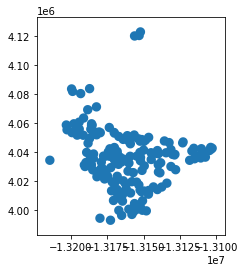

In [42]:
ss_dissolved.plot()

In [43]:
ss_dissolved

geometry  OBJECTID  \
0  MULTIPOLYGON (((-13177557.605 3992554.853, -13...      2878   

                                               Name              addrln1  \
0  California State Polytechnic University - Pomona  3801 W. Temple Ave.   

     city   latitude   longitude  store_count  
0  Pomona  34.049531 -117.814466            1

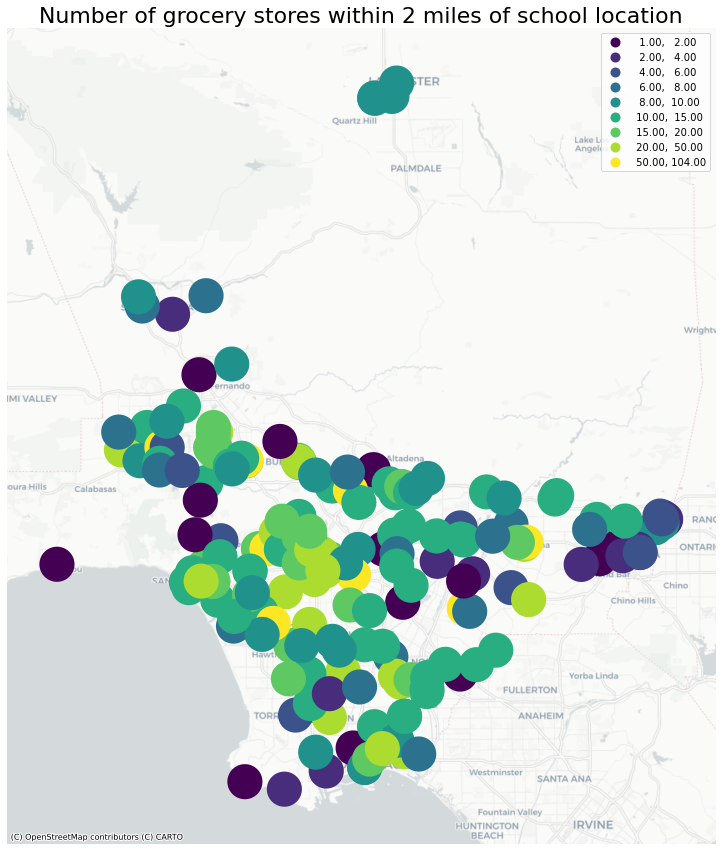

In [44]:
fig,ax = plt.subplots(figsize=(15,15))

ss_buffer.plot(ax=ax,
        column='store_count',
        legend=True,
        alpha=1,
        markersize=0.05,
        cmap='viridis',
        scheme='user_defined',
        classification_kwds={'bins':[2,4,6,8,10,15,20,50]})

ax.axis('off')
ax.set_title('Number of grocery stores within 2 miles of school location',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

### Now we want to see what kind of stores fall into that buffer

In [45]:
store_by_school=join.groupby(['Name','Store_Chain','addrln1'])['OBJECTID'].agg('count').reset_index()
store_by_school.head(50)

Name          Store_Chain  \
0   Abram Friedman Occupational Center          Food_4_Less   
1   Abram Friedman Occupational Center           Fresh&Easy   
2   Abram Friedman Occupational Center                 Jons   
3   Abram Friedman Occupational Center     Mother_Nutrition   
4   Abram Friedman Occupational Center            Northgate   
5   Abram Friedman Occupational Center           Numero_uno   
6   Abram Friedman Occupational Center               Ralphs   
7   Abram Friedman Occupational Center          Sav_on_drug   
8   Abram Friedman Occupational Center          Smart&final   
9   Abram Friedman Occupational Center     Superior_grocers   
10  Abram Friedman Occupational Center               Target   
11  Abram Friedman Occupational Center          Trader_joes   
12  Abram Friedman Occupational Center          Whole_Foods   
13           Academy Of Barbering Arts           Albertsons   
14           Academy Of Barbering Arts                 Aldi   
15           Academy Of Barbering Arts           Big_k_mart   
16           Academy Of Barbering Arts  Carniceria_Vallarta   
17           Academy Of Barbering Arts     Costco_Wholesale   
18           Academy Of Barbering Arts          Food_4_Less   
19           Academy Of Barbering Arts           Fresh&Easy   
20           Academy Of Barbering Arts              Gelsons   
21           Academy Of Barbering Arts                 Jons   
22           Academy Of Barbering Arts           Super_king   
23           Academy Of Barbering Arts               Target   
24           Academy Of Barbering Arts             Vallarta   
25           Academy Of Barbering Arts                 Vons   
26           Adelante Career Institute           Albertsons   
27           Adelante Career Institute                 Aldi   
28           Adelante Career Institute  Carniceria_Vallarta   
29           Adelante Career Institute             El_Super   
30           Adelante Career Institute          Food_4_Less   
31           Adelante Career Institute       Island_Pacific   
32           Adelante Career Institute                 Jons   
33           Adelante Career Institute     Mother_Nutrition   
34           Adelante Career Institute          Sav_on_drug   
35           Adelante Career Institute         Seafood_city   
36           Adelante Career Institute          Smart&final   
37           Adelante Career Institute           Super_king   
38           Adelante Career Institute               Target   
39           Adelante Career Institute             Vallarta   
40           Adelante Career Institute                 Vons   
41           Adelante Career Institute              Walmart   
42                    Advanced College           Albertsons   
43                    Advanced College             El_Super   
44                    Advanced College          Food_4_Less   
45                    Advanced College         Super_A_food   
46                    Advanced College             Vallarta   
47                    Advanced College              Walmart   
48             Alhambra Beauty College      99 Ranch Market   
49             Alhambra Beauty College           Albertsons   

                   addrln1  OBJECTID  
0      1646 S Olive Street         2  
1      1646 S Olive Street         2  
2      1646 S Olive Street         2  
3      1646 S Olive Street         4  
4      1646 S Olive Street         1  
5      1646 S Olive Street         3  
6      1646 S Olive Street         2  
7      1646 S Olive Street         1  
8      1646 S Olive Street         3  
9      1646 S Olive Street         2  
10     1646 S Olive Street         1  
11     1646 S Olive Street         1  
12     1646 S Olive Street         1  
13      19557 Parthenia St         2  
14      19557 Parthenia St         1  
15      19557 Parthenia St         1  
16      19557 Parthenia St         1  
17      19557 Parthenia St         1  
18      19557 Parthenia St         1  
19      19557 Parthenia St         1  
2

In [46]:
store_merge=gdf.merge(store_by_school,on='addrln1')
store_merge.head(20)

OBJECTID_x source ext_id       cat1                       cat2  cat3  \
0         2895    211   None  Education  Colleges and Universities  None   
1         2895    211   None  Education  Colleges and Universities  None   
2         2895    211   None  Education  Colleges and Universities  None   
3         2895    211   None  Education  Colleges and Universities  None   
4         2895    211   None  Education  Colleges and Universities  None   
5         2895    211   None  Education  Colleges and Universities  None   
6         2895    211   None  Education  Colleges and Universities  None   
7         2895    211   None  Education  Colleges and Universities  None   
8         2895    211   None  Education  Colleges and Universities  None   
9         2895    211   None  Education  Colleges and Universities  None   
10        2973    211   None  Education  Colleges and Universities  None   
11        2973    211   None  Education  Colleges and Universities  None   
12        3097    211   None  Education  Colleges and Universities  None   
13        3097    211   None  Education  Colleges and Universities  None   
14        3097    211   None  Education  Colleges and Universities  None   
15        3097    211   None  Education  Colleges and Universities  None   
16        3097    211   None  Education  Colleges and Universities  None   
17        3097    211   None  Education  Colleges and Universities  None   
18        3097    211   None  Education  Colleges and Universities  None   
19        3097    211   None  Education  Colleges and Universities  None   

                       org_name  \
0   www.calstate.edu/executive/   
1   www.calstate.edu/executive/   
2   www.calstate.edu/executive/   
3   www.calstate.edu/executive/   
4   www.calstate.edu/executive/   
5   www.calstate.edu/executive/   
6   www.calstate.edu/executive/   
7   www.calstate.edu/executive/   
8   www.calstate.edu/executive/   
9   www.calstate.edu/executive/   
10           www.calstatela.edu   
11           www.calstatela.edu   
12                www.laccd.edu   
13                www.laccd.edu   
14                www.laccd.edu   
15                www.laccd.edu   
16                www.laccd.edu   
17                www.laccd.edu   
18                www.laccd.edu   
19                www.laccd.edu   

                                               Name_x  \
0   California State University, The - Office Of T...   
1   California State University, The - Office Of T...   
2   California State University, The - Office Of T...   
3   California State University, The - Office Of T...   
4   California State University, The - Office Of T...   
5   California State University, The - Office Of T...   
6   California State University, The - Office Of T...   
7   California State University, The - Office Of T...   
8   California State University, The - Office Of T...   
9   California State University, The - Office Of T...   
10            California State University Los Angeles   
11            California State University Los Angeles   
12             Los Angeles Community College District   
13             Los Angeles Community College District   
14             Los Angeles Community College District   
15             Los Angeles Community College District   
16             Los Angeles Community College District   
17             Los Angeles Community College District   
18             Los Angeles Community College District   
19             Los Angeles Community College District   

                      addrln1         city  ... info2 post_id    zip  \
0            401 Golden Shore   Long Beach  ...  None    3084  90802   
1            401 Golden Shore   Long Beach  ...  None    3084  90802   
2            401 Golden Shore   Long Beach  ...  None    3084  90802   
3            401 Golden Shore   Long Beach  ...  None    3084  90802   
4            401 Golden Shore   Long Beach  ...  None    3084  90802   
5            401 Golden Shore   Long Beac

In [47]:
columns_to_keep= ['OBJECTID_x',
                  'Name_x',
                  'addrln1',
                  'city',
                  'latitude',
                  'longitude',
                  'geometry',
                  'Store_Chain',
                  'OBJECTID_y']

In [48]:
store_merge=store_merge[columns_to_keep]
store_merge.head()

OBJECTID_x                                             Name_x  \
0        2895  California State University, The - Office Of T...   
1        2895  California State University, The - Office Of T...   
2        2895  California State University, The - Office Of T...   
3        2895  California State University, The - Office Of T...   
4        2895  California State University, The - Office Of T...   

            addrln1        city   latitude   longitude  \
0  401 Golden Shore  Long Beach  33.764616 -118.201257   
1  401 Golden Shore  Long Beach  33.764616 -118.201257   
2  401 Golden Shore  Long Beach  33.764616 -118.201257   
3  401 Golden Shore  Long Beach  33.764616 -118.201257   
4  401 Golden Shore  Long Beach  33.764616 -118.201257   

                      geometry       Store_Chain  OBJECTID_y  
0  POINT (-118.20126 33.76462)        Albertsons           1  
1  POINT (-118.20126 33.76462)          El_Super           1  
2  POINT (-118.20126 33.76462)        Fresh&Easy           1  
3  POINT (-118.20126 33.76462)  Mother_Nutrition           1  
4  POINT (-118.20126 33.76462)        Numero_uno           1

In [49]:
store_merge.columns = ['OBJECTID',
                       'School_name',
                       'school_location',
                       'City',
                       'Latitude',
                       'Longitude',
                       'geometry',
                       'Store_Chain',
                       'store_count']

store_merge.head(20)

OBJECTID                                        School_name  \
0       2895  California State University, The - Office Of T...   
1       2895  California State University, The - Office Of T...   
2       2895  California State University, The - Office Of T...   
3       2895  California State University, The - Office Of T...   
4       2895  California State University, The - Office Of T...   
5       2895  California State University, The - Office Of T...   
6       2895  California State University, The - Office Of T...   
7       2895  California State University, The - Office Of T...   
8       2895  California State University, The - Office Of T...   
9       2895  California State University, The - Office Of T...   
10      2973            California State University Los Angeles   
11      2973            California State University Los Angeles   
12      3097             Los Angeles Community College District   
13      3097             Los Angeles Community College District   
14      3097             Los Angeles Community College District   
15      3097             Los Angeles Community College District   
16      3097             Los Angeles Community College District   
17      3097             Los Angeles Community College District   
18      3097             Los Angeles Community College District   
19      3097             Los Angeles Community College District   

              school_location         City   Latitude   Longitude  \
0            401 Golden Shore   Long Beach  33.764616 -118.201257   
1            401 Golden Shore   Long Beach  33.764616 -118.201257   
2            401 Golden Shore   Long Beach  33.764616 -118.201257   
3            401 Golden Shore   Long Beach  33.764616 -118.201257   
4            401 Golden Shore   Long Beach  33.764616 -118.201257   
5            401 Golden Shore   Long Beach  33.764616 -118.201257   
6            401 Golden Shore   Long Beach  33.764616 -118.201257   
7            401 Golden Shore   Long Beach  33.764616 -118.201257   
8            401 Golden Shore   Long Beach  33.764616 -118.201257   
9            401 Golden Shore   Long Beach  33.764616 -118.201257   
10  5151 State University Dr.  Los Angeles  34.062769 -118.170923   
11  5151 State University Dr.  Los Angeles  34.062769 -118.170923   
12         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
13         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
14         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
15         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
16         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
17         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
18         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   
19         770 Wilshire Blvd.  Los Angeles  34.049138 -118.258111   

                       geometry       Store_Chain  store_count  
0   POINT (-118.20126 33.76462)        Albertsons            1  
1   POINT (-118.20126 33.76462)          El_Super            1  
2   POINT (-118.20126 33.76462)        Fresh&Easy            1  
3   POINT (-118.20126 33.76462)  Mother_Nutrition            1  
4   POINT (-118.20126 33.76462)        Numero_uno            1  
5   POINT (-118.20126 33.76462)       Smart&final            1  
6   POINT (-118.20126 33.76462)  Superior_grocers            1  
7   POINT (-118.20126 33.76462)          Top_valu            1  
8   POINT (-118.20126 33.76462)              Vons            1  
9   POINT (-118.20126 33.76462)           Walmart            1  
10  POINT (-118.17092 34.06277)  Mother_Nutrition            1  
11  POINT (-118.17092 34.06277)       Sav_on_drug            1  
12  POINT (-118.25811 34.04914)       Food_4_Less            2  
13  POINT (-118.25811 34.04914)              Jons            1  
14  POINT (-118.25811 34.04914)  Mother_Nutrition            2  
15  POINT (-118.25811 34.04914)         Northgate            1  
16  POINT (-118.25811 34.04914)        Nu

In [50]:
stores_mini = store_merge[['OBJECTID','School_name','school_location','City','Latitude','Longitude','geometry','Store_Chain','store_count']].copy()

In [51]:
stores_mini.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2022 entries, 0 to 2021
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         2022 non-null   int64   
 1   School_name      2022 non-null   object  
 2   school_location  2022 non-null   object  
 3   City             2022 non-null   object  
 4   Latitude         2022 non-null   float64 
 5   Longitude        2022 non-null   float64 
 6   geometry         2022 non-null   geometry
 7   Store_Chain      2022 non-null   object  
 8   store_count      2022 non-null   int64   
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 158.0+ KB


In [52]:
stores_mini = stores_mini[stores_mini.Longitude != 0]

In [53]:
def store_map(store ='Ralphs'):
    
    fig = px.scatter_mapbox(
                            stores_mini[stores_mini.Store_Chain==store], 
                            lat="Latitude", 
                            lon="Longitude",
                            color= "School_name",
                            hover_name="Store_Chain"
                           )

    fig.update_layout(mapbox_style="carto-darkmatter")

    fig.show()

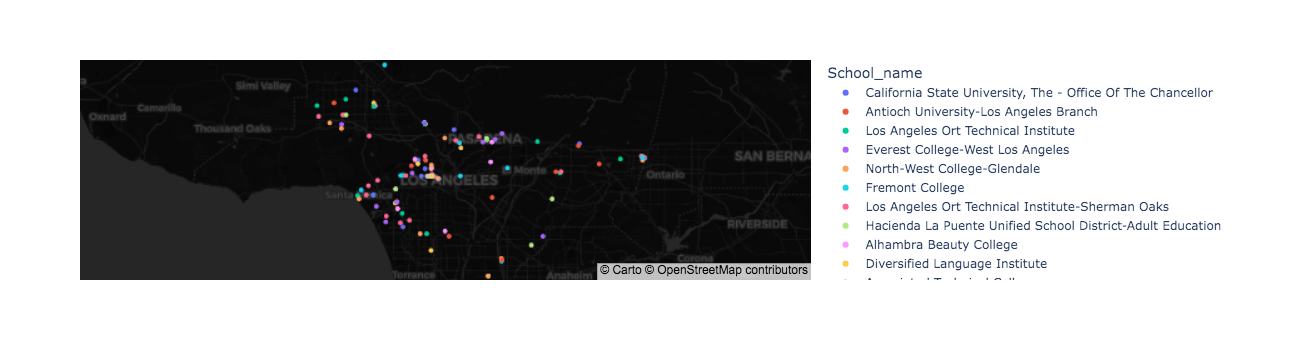

In [54]:
store_map(store='Vons')

The two codes below list will loop through all the Store Chains which are 46 and about 217 schools. This causes plotly to crash, so for simplification - I will loop through the top most common stores in the buffers 

In [55]:
#store_list = stores_mini.Store_Chain.unique().tolist()

In [56]:
#for store in store_list:
 #   store_map(store)

In [57]:
##for store in top_store_list:
  #  store_map(store)

### Showing most frequent store as bar chart

In [58]:
#some stores are being counted twice in buffer

In [59]:
ss_dissolved

geometry  OBJECTID  \
0  MULTIPOLYGON (((-13177557.605 3992554.853, -13...      2878   

                                               Name              addrln1  \
0  California State Polytechnic University - Pomona  3801 W. Temple Ave.   

     city   latitude   longitude  store_count  
0  Pomona  34.049531 -117.814466            1

In [60]:
ss_dissolved = ss_dissolved.to_crs(epsg=3857)

In [61]:
stores_mini = stores_mini.to_crs(epsg=3857)

In [62]:
dissolved_join = gpd.sjoin( ss_dissolved,grs_s, how='left')
dissolved_join.head(10)

geometry  OBJECTID  \
0  MULTIPOLYGON (((-13177557.605 3992554.853, -13...      2878   
0  MULTIPOLYGON (((-13177557.605 3992554.853, -13...      2878   
0  MULTIPOLYGON (((-13177557.605 3992554.853, -13...      2878   
0  MULTIPOLYGON (((-13177557.605 3992554.853, -13...      2878   
0  MULTIPOLYGON (((-13177557.605 3992554.853, -13...      2878   
0  MULTIPOLYGON (((-13177557.605 3992554.853, -13...      2878   
0  MULTIPOLYGON (((-13177557.605 3992554.853, -13...      2878   
0  MULTIPOLYGON (((-13177557.605 3992554.853, -13...      2878   
0  MULTIPOLYGON (((-13177557.605 3992554.853, -13...      2878   
0  MULTIPOLYGON (((-13177557.605 3992554.853, -13...      2878   

                                               Name              addrln1  \
0  California State Polytechnic University - Pomona  3801 W. Temple Ave.   
0  California State Polytechnic University - Pomona  3801 W. Temple Ave.   
0  California State Polytechnic University - Pomona  3801 W. Temple Ave.   
0  California State Polytechnic University - Pomona  3801 W. Temple Ave.   
0  California State Polytechnic University - Pomona  3801 W. Temple Ave.   
0  California State Polytechnic University - Pomona  3801 W. Temple Ave.   
0  California State Polytechnic University - Pomona  3801 W. Temple Ave.   
0  California State Polytechnic University - Pomona  3801 W. Temple Ave.   
0  California State Polytechnic University - Pomona  3801 W. Temple Ave.   
0  California State Polytechnic University - Pomona  3801 W. Temple Ave.   

     city   latitude   longitude  store_count  index_right  \
0  Pomona  34.049531 -117.814466            1         1270   
0  Pomona  34.049531 -117.814466            1           96   
0  Pomona  34.049531 -117.814466            1          880   
0  Pomona  34.049531 -117.814466            1          403   
0  Pomona  34.049531 -117.814466            1         1039   
0  Pomona  34.049531 -117.814466            1          280   
0  Pomona  34.049531 -117.814466            1          231   
0  Pomona  34.049531 -117.814466            1         1182   
0  Pomona  34.049531 -117.814466            1          336   
0  Pomona  34.049531 -117.814466            1          784   

                      Store_Name         City  Store_Chain  Latitude  \
0                      VONS 2162    San Pedro         Vons  33.72176   
0                ALBERTSONS 6160    San Pedro   Albertsons  33.72316   
0              Smart & Final 923    San Pedro  Smart&final  33.72316   
0  Haggen Food and Pharmacy 2178    San Pedro       Haggen  33.72316   
0            Target Store T-2470    San Pedro       Target  33.76109   
0               FOOD 4 LESS  760   Wilmington  Food_4_Less  33.77975   
0                    El Super 48   Wilmington     El_Super  33.77989   
0  VALU PLUS FOOD WAREHOUSE #4     Wilmington    Valu_plus  33.77989   
0              Fresh & Easy 1074  Harbor City   Fresh&Easy  33.77995   
0              SAV ON DRUG  9414   Wilmington  Sav_on_drug  33.79108   

   Longitude  
0  -118.3107  
0  -118.3131  
0  -118.3131  
0  -118.3131  
0   -118.293  
0  -118.2658  
0  -118.2632  
0  -118.2632  
0  -118.3095  
0  -118.2659

In [63]:
chain_count = dissolved_join.Store_Chain.value_counts().reset_index()
chain_count.to_csv('chain_count_freq.csv')

In [64]:
chain_count

index  Store_Chain
0                  Ralphs          100
1             Smart&final           74
2                    Vons           69
3              Albertsons           61
4                  Target           57
5        Mother_Nutrition           52
6             Food_4_Less           37
7             Sav_on_drug           36
8             Trader_joes           34
9              Fresh&Easy           33
10                Walmart           26
11             Numero_uno           25
12            Whole_Foods           23
13       Superior_grocers           22
14               Vallarta           19
15                Sprouts           19
16               El_Super           19
17       Costco_Wholesale           18
18                   Aldi           18
19            Stater_bros           18
20                   Jons           17
21              Northgate           14
22         Grocery_Outlet           12
23                  Kmart           11
24                Gelsons           10
25           Super_A_food            9
26   Best_way_supermarket            9
27               Top_valu            8
28        99 Ranch Market            8
29         Big_saver_food            8
30           Payless_food            7
31         Island_Pacific            7
32             Big_k_mart            6
33                 Haggen            5
34           Seafood_city            5
35                Buy_low            5
36              Valu_plus            5
37              Sams_club            5
38                R_ranch            4
39                 H_mart            4
40    Carniceria_Vallarta            4
41             Super_king            4
42                Gigante            3
43  Hong_kong_supermarket            3
44                   Hows            2
45                 Amazon            2
46               Galleria            1

In [65]:
chain_count1 = pd.read_csv('chain_count_freq.csv',index_col=0)
chain_count1.head()

index  Store_Chain
0       Ralphs          100
1  Smart&final           74
2         Vons           69
3   Albertsons           61
4       Target           57

In [66]:
store_in_buffer = chain_count1.drop(index=[20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46])
print(store_in_buffer)

               index  Store_Chain
0             Ralphs          100
1        Smart&final           74
2               Vons           69
3         Albertsons           61
4             Target           57
5   Mother_Nutrition           52
6        Food_4_Less           37
7        Sav_on_drug           36
8        Trader_joes           34
9         Fresh&Easy           33
10           Walmart           26
11        Numero_uno           25
12       Whole_Foods           23
13  Superior_grocers           22
14          Vallarta           19
15           Sprouts           19
16          El_Super           19
17  Costco_Wholesale           18
18              Aldi           18
19       Stater_bros           18


In [67]:
store_in_buffer.columns = ['Store_chain', 'number']
store_in_buffer

Store_chain  number
0             Ralphs     100
1        Smart&final      74
2               Vons      69
3         Albertsons      61
4             Target      57
5   Mother_Nutrition      52
6        Food_4_Less      37
7        Sav_on_drug      36
8        Trader_joes      34
9         Fresh&Easy      33
10           Walmart      26
11        Numero_uno      25
12       Whole_Foods      23
13  Superior_grocers      22
14          Vallarta      19
15           Sprouts      19
16          El_Super      19
17  Costco_Wholesale      18
18              Aldi      18
19       Stater_bros      18

In [68]:
store_comp= stores_county.merge(store_in_buffer,on='Store_chain')
store_comp.head(20)

Store_chain  number_x  number_y
0             Ralphs       145       100
1               Vons       111        69
2        Smart&final        99        74
3         Albertsons        97        61
4             Target        76        57
5   Mother_Nutrition        65        52
6        Trader_joes        60        34
7        Food_4_Less        54        37
8            Walmart        49        26
9         Fresh&Easy        47        33
10       Sav_on_drug        44        36
11  Superior_grocers        33        22
12       Whole_Foods        33        23
13        Numero_uno        30        25
14       Stater_bros        29        18
15          El_Super        28        19
16           Sprouts        27        19
17          Vallarta        27        19
18              Aldi        27        18
19  Costco_Wholesale        26        18

In [69]:
store_comp.columns = ['Store Chain', 'Stores in County','Stores in Buffer Zone']
store_comp

Store Chain  Stores in County  Stores in Buffer Zone
0             Ralphs               145                    100
1               Vons               111                     69
2        Smart&final                99                     74
3         Albertsons                97                     61
4             Target                76                     57
5   Mother_Nutrition                65                     52
6        Trader_joes                60                     34
7        Food_4_Less                54                     37
8            Walmart                49                     26
9         Fresh&Easy                47                     33
10       Sav_on_drug                44                     36
11  Superior_grocers                33                     22
12       Whole_Foods                33                     23
13        Numero_uno                30                     25
14       Stater_bros                29                     18
15          El_Super                28                     19
16           Sprouts                27                     19
17          Vallarta                27                     19
18              Aldi                27                     18
19  Costco_Wholesale                26                     18

In [70]:
#Normalize the data

In [71]:
store_comp['Percent Stores within 2 miles of Schools'] = store_comp['Stores in Buffer Zone']/store_comp['Stores in County']*100

In [72]:
store_comp

Store Chain  Stores in County  Stores in Buffer Zone  \
0             Ralphs               145                    100   
1               Vons               111                     69   
2        Smart&final                99                     74   
3         Albertsons                97                     61   
4             Target                76                     57   
5   Mother_Nutrition                65                     52   
6        Trader_joes                60                     34   
7        Food_4_Less                54                     37   
8            Walmart                49                     26   
9         Fresh&Easy                47                     33   
10       Sav_on_drug                44                     36   
11  Superior_grocers                33                     22   
12       Whole_Foods                33                     23   
13        Numero_uno                30                     25   
14       Stater_bros                29                     18   
15          El_Super                28                     19   
16           Sprouts                27                     19   
17          Vallarta                27                     19   
18              Aldi                27                     18   
19  Costco_Wholesale                26                     18   

    Percent Stores within 2 miles of Schools  
0                                  68.965517  
1                                  62.162162  
2                                  74.747475  
3                                  62.886598  
4                                  75.000000  
5                                  80.000000  
6                                  56.666667  
7                                  68.518519  
8                                  53.061224  
9                                  70.212766  
10                                 81.818182  
11                                 66.666667  
12                                 69.696970  
13                                 83.333333  
14                                 62.068966  
15                                 67.857143  
16                                 70.370370  
17                                 70.370370  
18                                 66.666667  
19                                 69.230769

In [73]:
## Intesting - Numero Uno seems to be the store chain with the highest percent of locations within 2 miles of a school. Also, all the Store Chains seem to have atleast 50% of their locations within 2 miles of a school

In [74]:
#bar chart showing all the store chains within buffer and frequency

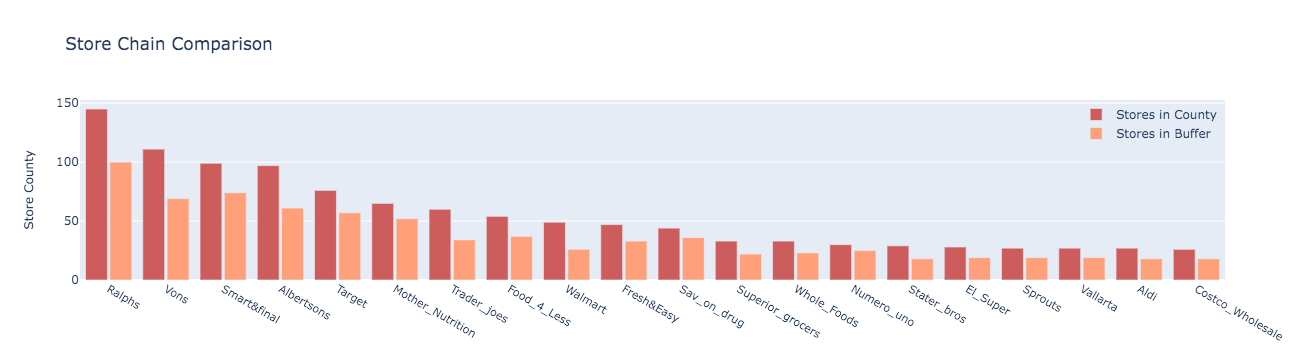

In [77]:
import plotly.graph_objects as go

Stores = ['Ralphs', 'Vons', 'Smart&final', 'Albertsons', 'Target', 'Mother_Nutrition',
          'Trader_joes', 'Food_4_Less', 'Walmart', 'Fresh&Easy', 'Sav_on_drug', 'Superior_grocers','Whole_Foods', 'Numero_uno', 'Stater_bros', 'El_Super', 'Sprouts', 'Vallarta', 'Aldi', 'Costco_Wholesale']

fig = go.Figure()
fig.add_trace(go.Bar(
    x= Stores,
    y=[145, 111, 99, 97, 76, 65, 60, 54, 49, 47, 44, 33, 33, 30, 29, 28, 27, 27, 27, 26],
    name='Stores in County',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x= Stores,
    y=[100, 69, 74, 61, 57, 52, 34, 37, 26, 33, 36, 22, 23, 25, 18, 19, 19, 19, 18, 18],
    name='Stores in Buffer',
    marker_color='lightsalmon'
))
fig.update_layout(
    title='Store Chain Comparison',
    xaxis_tickfont_size=11,
    yaxis=dict(
        title='Store County',
        titlefont_size=12,
        tickfont_size=12,
    ),
    legend=dict(
        x=.87,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

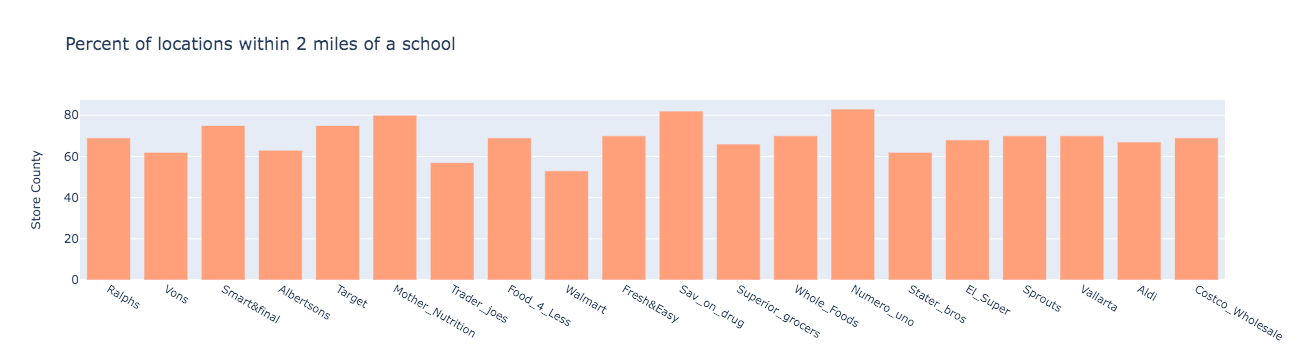

In [82]:

Stores = ['Ralphs', 'Vons', 'Smart&final', 'Albertsons', 'Target', 'Mother_Nutrition',
          'Trader_joes', 'Food_4_Less', 'Walmart', 'Fresh&Easy', 'Sav_on_drug', 'Superior_grocers','Whole_Foods', 'Numero_uno', 'Stater_bros', 'El_Super', 'Sprouts', 'Vallarta', 'Aldi', 'Costco_Wholesale']

fig = go.Figure()
fig.add_trace(go.Bar(
    x= Stores,
    y=[69, 62, 75, 63, 75, 80, 57, 69, 53, 70, 82, 66, 70, 83, 62, 68, 70, 70, 67, 69, 100],
    name='Percent in buffer',
    marker_color='lightsalmon'
))
fig.update_layout(
    title='Percent of locations within 2 miles of a school',
    xaxis_tickfont_size=11,
    yaxis=dict(
        title='Store County',
        titlefont_size=12,
        tickfont_size=12,
    ),
    legend=dict(
        x=.87,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [75]:
## Extra codes - possible use?

In [76]:
#stores_mini['Latitude'] = stores_mini['Latitude'].astype(float)
#stores_mini['Longitude'] = stores_mini['Longitude'].astype(float)
#stores_mini.info()

In [77]:
##def school_map(school ='University Of California-Los Angeles'):
    
    ##fig = px.scatter_mapbox(
                            #stores_mini[stores_mini.School_name==school], 
                            #lat="Latitude", 
                            #lon="Longitude",
                            #color= "Store_Chain",
                            #hover_name="School_name"
                           #)

    #fig.update_layout(mapbox_style="carto-darkmatter")

    #fig.show()

In [78]:
#school_map(school='University Of California-Los Angeles')

In [79]:
#school_map(school='University Of Southern California')

In [80]:
#for school in school_list:
    #school_map(school)